In [1]:
import numpy as np
import librosa
import scipy
from scipy.io import wavfile
import os, time, csv, datetime
from librosa import display
import matplotlib.pyplot as plt 
from numpy import diff
#import pyworld as pw
import h5py

import sklearn
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import warnings
warnings.filterwarnings("ignore")

In [11]:
parent_dir = os.getcwd()
dataset_dir = os.path.join(parent_dir,'RAVDESS')
dataset_rec = os.path.join(parent_dir,'RECORDINGSS')
print(dataset_dir, dataset_rec)

/Users/apple/HOME WORK/SRU/PROJECT/RAVDESS /Users/apple/HOME WORK/SRU/PROJECT/RECORDINGSS


In [8]:
length_wave_max = 85346 #maximum length of the audio waves
 
emo_label ={0: 'neutral', 1:'calm', 2: 'happy',
            3: 'sad',   4: 'angry', 5: 'fearful',
            6: 'disgust', 7: 'surprise'}

features = []
labels  = []
max_frame_len = 442 #maximum length of the audio waves
emotionset = [0,1, 2, 3, 4, 5, 6, 7]


In [14]:
#Preparing training set from RAVDESS

totalem = range(len(emotionset))
tr_wave = []
tr_lab = []
# val_wave = []
# val_lab = []
# test_wave = []
# test_lab = []

for emnum in totalem:   

    _waveform = []
    _labels  = []
    emotion = emotionset[emnum]
    print(emotion)
    print('Reading emotion #' + str(emotion) + ' :' + emo_label[emotion] + '...')
    
    emotion_dir = os.path.join(dataset_dir, str(emotion))
    print(emotion_dir)
    
    file_list = os.listdir(emotion_dir)
    sett = range(len(file_list))
    
    for filenum in sett:
        
        #Load the dataset 
        y, sr = librosa.load(os.path.join(emotion_dir, file_list[filenum]),dtype=np.float32) 
        
        # truncate or zero-pad the signal
        y = y[:length_wave_max]
        if len(y) < length_wave_max:
            y = np.concatenate([y, np.zeros(length_wave_max-len(y))])
            
        _waveform.append(y)
        _labels.append(emotion)
        
        waveform = np.array(_waveform)
        labels = np.array(_labels)
    
    X_train = waveform
    y_train = labels
    #X_train, X_test, y_train, y_test = train_test_split(waveform, labels, test_size=0.2, random_state=10) 
#     X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=10) 
    
    print('Train',X_train.shape)
    tr_wave.append(X_train)
    tr_lab.append(y_train)
    
#     print('Val',X_val.shape)
#     val_wave.append(X_val)
#     val_lab.append(y_val)
    
    #print('Test',X_test.shape)
    #test_wave.append(X_test)
    #test_lab.append(y_test)


0
Reading emotion #0 :neutral...
/Users/apple/HOME WORK/SRU/PROJECT/RAVDESS/0
Train (188, 85346)
1
Reading emotion #1 :calm...
/Users/apple/HOME WORK/SRU/PROJECT/RAVDESS/1
Train (376, 85346)
2
Reading emotion #2 :happy...
/Users/apple/HOME WORK/SRU/PROJECT/RAVDESS/2
Train (376, 85346)
3
Reading emotion #3 :sad...
/Users/apple/HOME WORK/SRU/PROJECT/RAVDESS/3
Train (376, 85346)
4
Reading emotion #4 :angry...
/Users/apple/HOME WORK/SRU/PROJECT/RAVDESS/4
Train (376, 85346)
5
Reading emotion #5 :fearful...
/Users/apple/HOME WORK/SRU/PROJECT/RAVDESS/5
Train (376, 85346)
6
Reading emotion #6 :disgust...
/Users/apple/HOME WORK/SRU/PROJECT/RAVDESS/6
Train (192, 85346)
7
Reading emotion #7 :surprise...
/Users/apple/HOME WORK/SRU/PROJECT/RAVDESS/7
Train (192, 85346)


In [12]:
#Preparing test set from recorded files

totalem = range(len(emotionset))
#tr_wave = []
#tr_lab = []
#val_wave = []
#val_lab = []
test_wave = []
test_lab = []

for emnum in totalem:   

    _waveform = []
    _labels  = []
    emotion = emotionset[emnum]
    print(emotion)
    print('Reading emotion #' + str(emotion) + ' :' + emo_label[emotion] + '...')
    
    emotion_rec = os.path.join(dataset_rec, str(emotion))
    print(emotion_rec)
    
    file_list1 = os.listdir(emotion_rec)
    sett1 = range(len(file_list1))
    ind=0
    for filenum in sett1:
        #Load the dataset 
        y1, sr = librosa.load(os.path.join(emotion_rec, file_list1[filenum]),dtype=np.float32) 
        
        # truncate or zero-pad the signal
        y1 = y1[:length_wave_max]
        if len(y1) < length_wave_max:
            y1 = np.concatenate([y1, np.zeros(length_wave_max-len(y1))])
            
        _waveform.append(y1)
        _labels.append(emotion)
        
        waveform1 = np.array(_waveform)
        labels1 = np.array(_labels)
    
    X_test = waveform1
    y_test = labels1
    #X_train, X_test, y_train, y_test = train_test_split(waveform, labels, test_size=0.2, random_state=10) 
#     X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=10) 
    
    #print('Train',X_train.shape)
    #tr_wave.append(X_train)
    #tr_lab.append(y_train)
    
#     print('Val',X_val.shape)
#     val_wave.append(X_val)
#     val_lab.append(y_val)
    
    print('Test',X_test.shape)
    test_wave.append(X_test)
    test_lab.append(y_test)


0
Reading emotion #0 :neutral...
/Users/apple/HOME WORK/SRU/PROJECT/RECORDINGSS/0
Test (17, 85346)
1
Reading emotion #1 :calm...
/Users/apple/HOME WORK/SRU/PROJECT/RECORDINGSS/1
Test (12, 85346)
2
Reading emotion #2 :happy...
/Users/apple/HOME WORK/SRU/PROJECT/RECORDINGSS/2
Test (8, 85346)
3
Reading emotion #3 :sad...
/Users/apple/HOME WORK/SRU/PROJECT/RECORDINGSS/3
Test (8, 85346)
4
Reading emotion #4 :angry...
/Users/apple/HOME WORK/SRU/PROJECT/RECORDINGSS/4
Test (12, 85346)
5
Reading emotion #5 :fearful...
/Users/apple/HOME WORK/SRU/PROJECT/RECORDINGSS/5
Test (9, 85346)
6
Reading emotion #6 :disgust...
/Users/apple/HOME WORK/SRU/PROJECT/RECORDINGSS/6
Test (8, 85346)
7
Reading emotion #7 :surprise...
/Users/apple/HOME WORK/SRU/PROJECT/RECORDINGSS/7
Test (12, 85346)


In [5]:
from subprocess import call
r=call('ffmpeg -i "test.mp3" -acodec pcm_u8 -ar 22050 "test.wav"',shell=True)

In [15]:
tr_w = np.array(tr_wave); tr_w = np.vstack((tr_w[0], tr_w[1], tr_w[2], tr_w[3], tr_w[4], tr_w[5], tr_w[6], tr_w[7] ))
tr_l = np.array(tr_lab);  tr_l = np.hstack((tr_l[0], tr_l[1], tr_l[2], tr_l[3], tr_l[4], tr_l[5], tr_l[6], tr_l[7] )) 
print('Total Training set',tr_w.shape) 


test_w = np.array(test_wave); test_w = np.vstack((test_w[0], test_w[1], test_w[2], test_w[3], test_w[4], test_w[5], test_w[6], test_w[7] ))
test_l = np.array(test_lab);  test_l = np.hstack((test_l[0], test_l[1], test_l[2], test_l[3], test_l[4], test_l[5], test_l[6], test_l[7] )) 
print('Total Test set',test_w.shape) 

#plt.figure(1, figsize=(8,2))
#plt.subplot(121); plt.plot(tr_w[334,:])
#plt.subplot(122); plt.plot(test_w[100,:])
#plt.tight_layout()

Total Training set (2452, 85346)
Total Test set (86, 85346)


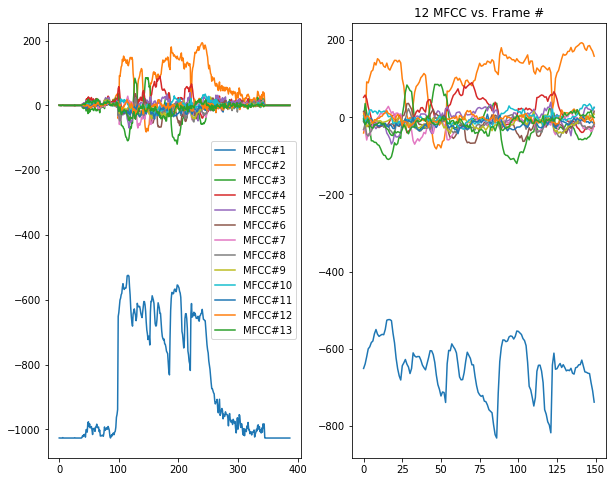

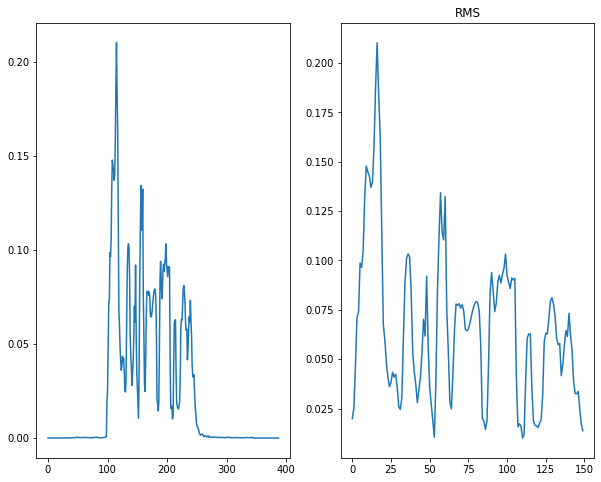

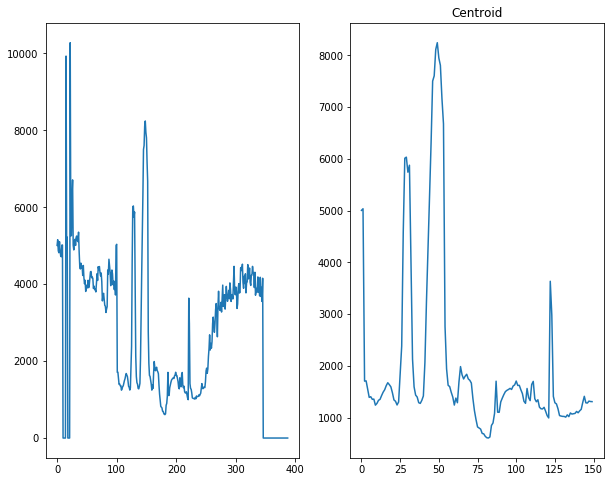

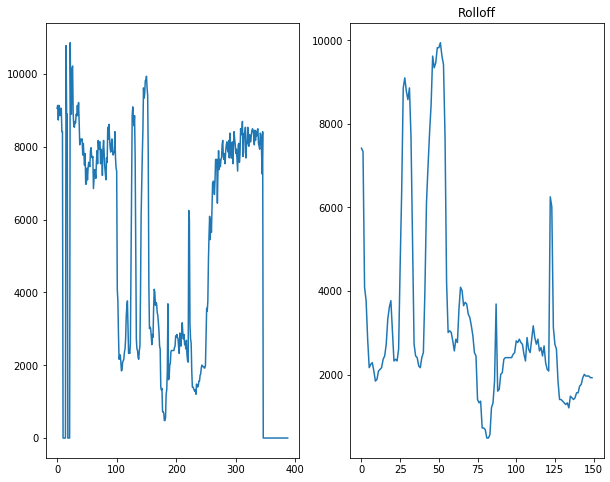

In [16]:
frame_t = 0.025 #25ms 
frame_n = round(sr*frame_t) 

hop_n = round(0.01*sr) #10ms 

tr_features = []; tr_labels  = []
test_features = []; test_labels = [] 

for sets in range(2): 
    if sets == 0:
        mydata = tr_w
        #print('Feature Extraction for Training Set', sets)
    if sets == 1:
        mydata = test_w
        #print('Feature Extraction for Test Set', sets)
    
    ind=0
    for wavs in range(len(mydata)): 
        ind+=1
        #print(ind,end=" ")
        y = mydata[wavs,:]   
 
        mfcc_num = 13 
        Ethresh = 0.01
        
        S, phase = librosa.magphase(librosa.stft(y=y,win_length=frame_n, hop_length=hop_n))
        rmst = (librosa.feature.rmse(S=S,frame_length=frame_n, hop_length=hop_n))
        
        Elocs = np.where(rmst>Ethresh)[1] #all places where greater than 0.05
        Eloc = np.arange(Elocs[0],Elocs[-1]+1) #only chop off ends, keep middle zeros for silence frames
        rms = rmst[:,Eloc]
        
#----------------------------------------------------------
        #MFCC per frame
        MFCCt = librosa.feature.mfcc(y=y, sr=sr, n_fft=frame_n, hop_length=hop_n, n_mfcc=mfcc_num)
        MFCC = MFCCt[:, Eloc]
#         print('Shape of MFCC', MFCC.shape)

#----------------------------------------------------------
        _cent = librosa.feature.spectral_centroid(y=y, sr=sr, n_fft=frame_n, hop_length=hop_n)
        cent = _cent[:,Eloc]
#----------------------------------------------------------

        _rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr, n_fft=frame_n, hop_length=hop_n)
        rolloff = _rolloff[:,Eloc]
#---------------------------------------------------------

        zcrt = librosa.feature.zero_crossing_rate(y=y, frame_length=frame_n, hop_length=hop_n)
        zcr = zcrt[:,Eloc]
#----------------------------------------------------------
 
        #Plot the sample features 
        if sets == 0 and wavs == 0:
            plt.figure(1, figsize=(10,8))
            for i in range(13):
                plt.subplot(121)
                plt.plot(MFCCt[i,:],label="MFCC#{}".format(i+1))
                plt.legend()
                plt.subplot(122)
                plt.plot(MFCC[i,:],label="MFCC#{}".format(i+1))
                plt.title('12 MFCC vs. Frame #')
                
                
            plt.figure(2, figsize=(10,8))
            plt.subplot(121)
            plt.plot(rmst[0,:],label='ZCR')
            plt.subplot(122)
            plt.plot(rms[0,:],label='ZCR')
            plt.title('RMS')
            
            plt.figure(3, figsize=(10,8))
            plt.subplot(121)
            plt.plot(_cent[0,:],label='ZCR')
            plt.subplot(122)
            plt.plot(cent[0,:],label='ZCR')
            plt.title('Centroid')
 
            plt.figure(4, figsize=(10,8))
            plt.subplot(121)
            plt.plot(_rolloff[0,:],label='ZCR')
            plt.subplot(122)
            plt.plot(rolloff[0,:],label='ZCR')
            plt.title('Rolloff')
 
        MFCC = np.mean(MFCC, axis=1)
        zcr = np.mean(zcr, axis =1)
        rms = np.mean(rms, axis =1)
        cent = np.mean(cent, axis =1)
        rolloff = np.mean(rolloff, axis=1)  
#-------------------------------------------------------

        MFCC = np.reshape(MFCC, (len(MFCC),1)) 
        zcr = np.reshape(zcr, (len(zcr),1)) 
        rms = np.reshape(rms, (len(rms),1)) 
        cent = np.reshape(cent, (len(cent),1)) 
        rolloff = np.reshape(rolloff, (len(rolloff),1))
        
#----------------------------------------------------------     

        concat = np.vstack((MFCC,zcr, rms, cent, rolloff))
        
        if sets == 0:
           tr_features.append(concat[:,0])   
           tr_labels.append(tr_l[wavs])
        if sets == 1: 
           test_features.append(concat[:,0])
           test_labels.append(test_l[wavs])

In [ ]:
#pip install 'librosa==0.6.3'

Train -Audio x Features x Frames (2452, 17)
Train -Labels of audio (2452,)
Test -Audio x Features x Frames (86, 17)
Test -Labels of audio (86,)


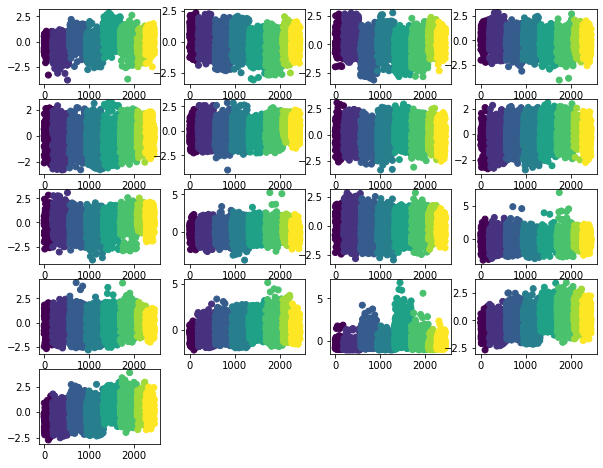

In [17]:
tr_fea = np.array(tr_features); tr_lab = np.array(tr_labels)
print('Train -Audio x Features x Frames',tr_fea.shape)
print('Train -Labels of audio',(tr_lab.shape))  

test_fea = np.array(test_features); test_lab = np.array(test_labels)
print('Test -Audio x Features x Frames',test_fea.shape)
print('Test -Labels of audio',(test_lab.shape))  

#Normalize the training features: 
scaler = preprocessing.StandardScaler().fit(tr_fea)
tr_fea = scaler.transform(tr_fea) 

for i in range(tr_fea.shape[1]): 
    plt.figure(1, figsize=(10,8))
    plt.subplot(5,4,i+1)
    plt.scatter(np.arange(tr_fea.shape[0]),tr_fea[:,i],c=tr_lab);


# Naive Bayes

In [ ]:
test_lab

In [ ]:
y_pred

In [18]:
from sklearn.metrics import accuracy_score, f1_score

from sklearn.naive_bayes import GaussianNB
GNB = GaussianNB()
GNB.fit(tr_fea, tr_lab)
y_pred = GNB.predict(test_fea)

In [19]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [20]:
results = confusion_matrix(y_pred,test_lab)

print ('Confusion Matrix :')
print(results)
print ('Accuracy Score :',accuracy_score(y_pred,test_lab))
print ('Report : ')
print (classification_report(y_pred,test_lab))



Confusion Matrix :
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [17 12  8  8 12  9  8 12]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]]
Accuracy Score : 0.10465116279069768
Report : 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       1.00      0.10      0.19        86
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         0

    accuracy                           0.10        86
   macro avg       0.12      0.01      0.02        86
weighted avg       1.00      0.10      0.19        86



In [51]:
y_pred.shape

(86,)

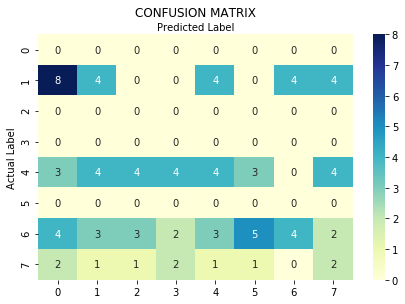

In [49]:
import seaborn as sns
import pandas as pd
%matplotlib inline
class_names=[0,1,2,3,4,5,6,7] #name of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

#create heatmap
sns.heatmap(pd.DataFrame(results), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('CONFUSION MATRIX', Y=1.1)
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

# Decision Tree

In [29]:
from sklearn import tree

decision_model = tree.DecisionTreeClassifier()
startTime=time.time()
decision_model.fit(tr_fea, tr_lab)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [31]:
y_pred=decision_model.predict(test_fea)
resultss = confusion_matrix(y_pred,test_lab)

print ('Confusion Matrix :')
print(results)
print ('Accuracy Score :',accuracy_score(y_pred,test_lab))
print ('Report : ')
print (classification_report(y_pred,test_lab))


Confusion Matrix :
[[0 0 0 0 0 0 0 0]
 [8 4 0 0 4 0 4 4]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [3 4 4 4 4 3 0 4]
 [0 0 0 0 0 0 0 0]
 [4 3 3 2 3 5 4 2]
 [2 1 1 2 1 1 0 2]]
Accuracy Score : 0.16279069767441862
Report : 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.33      0.17      0.22        24
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.33      0.15      0.21        26
           5       0.00      0.00      0.00         0
           6       0.50      0.15      0.24        26
           7       0.17      0.20      0.18        10

    accuracy                           0.16        86
   macro avg       0.17      0.08      0.11        86
weighted avg       0.36      0.16      0.22        86



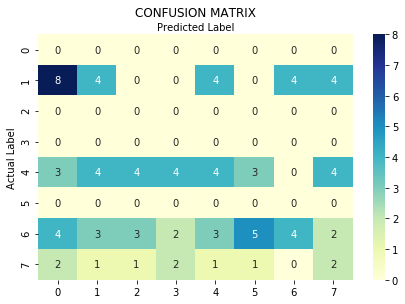

In [48]:
import seaborn as sns
import pandas as pd
%matplotlib inline
class_names=[0,1,2,3,4,5,6,7] #name of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

#create heatmap
sns.heatmap(pd.DataFrame(resultss), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('CONFUSION MATRIX', Y=1.1)
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

# ONE vs ONE CLASSIFIER(RBF kernel)

In [34]:
from sklearn import svm
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
 
clf =  (OneVsOneClassifier(svm.SVC(kernel = 'rbf', gamma = 'auto',C=1,class_weight = 'balanced',tol = 1e-15, verbose = True))).fit(tr_fea, tr_lab)
print("")
print('Training Score',clf.score(tr_fea, tr_lab)) 

test_fea_transformed = scaler.transform(test_fea)
print('Score',clf.score(test_fea_transformed, test_lab)) 
  
test_lab_pred = clf.predict(test_fea_transformed)
acc = accuracy_score(test_lab_pred,test_lab)
print('Accuracy',acc)
print(test_lab_pred)
print(test_lab)
cm = confusion_matrix(test_lab_pred, test_lab)

cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

#print(confusion_matrix(test_lab_pred, test_lab))
print(cm) 
#plot_confusion_matrix(test_lab, test_lab_pred, classes=emotionclassname, normalize=True, title='Normalized confusion matrix')

#plt.savefig('norm4emo.png')

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]
Training Score 0.6517128874388255
Score 0.11627906976744186
Accuracy 0.11627906976744186
[3 4 2 5 5 5 3 4 5 2 3 5 4 3 2 5 1 0 3 5 2 5 2 5 2 0 7 5 2 2 5 3 5 5 2 3 3
 5 1 5 1 1 5 3 5 5 3 4 2 2 5 2 3 5 2 5 4 5 3 5 3 3 3 5 3 5 5 7 4 5 4 5 5 7
 2 5 2 7 2 5 0 5 2 5 2 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2
 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5 6 6 6 6 6 6 6 6
 7 7 7 7 7 7 7 7 7 7 7 7]
[[0.         0.5        0.         0.         0.         0.
  0.         0.5       ]
 [0.25       0.         0.         0.75       0.         0.
  0.         0.        ]
 [0.16666667 0.22222222 0.11111111 0.         0.22222222 0.
  0.         0.27777778]
 [0.25       0.0625     0.1875     0.0625     0.125      0.3125
  0.         0.

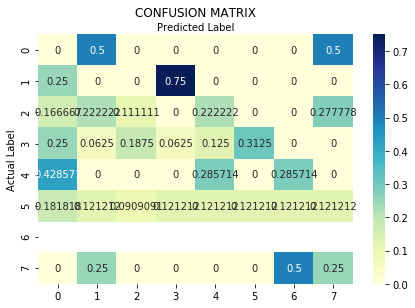

In [47]:
import seaborn as sns
import pandas as pd
%matplotlib inline
class_names=[0,1] #name of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

#create heatmap
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('CONFUSION MATRIX', Y=1.1)
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

# Logistic Regression

In [36]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

logreg.fit(tr_fea, tr_lab)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [41]:
y_pred=logreg.predict(test_fea)

In [42]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(test_lab, y_pred)
cnf_matrix

array([[ 0,  0,  0,  0,  0,  0,  0, 17],
       [ 0,  0,  0,  0,  0,  0,  0, 12],
       [ 0,  0,  0,  0,  0,  0,  0,  8],
       [ 0,  0,  0,  0,  0,  0,  0,  8],
       [ 0,  0,  0,  0,  0,  0,  0, 12],
       [ 0,  0,  0,  0,  0,  0,  0,  9],
       [ 0,  0,  0,  0,  0,  0,  0,  8],
       [ 0,  0,  0,  0,  0,  0,  0, 12]])

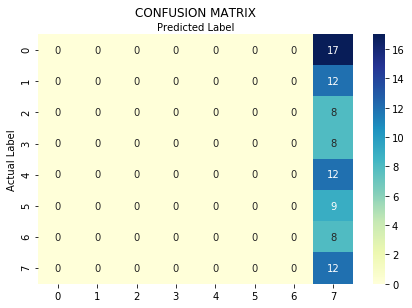

In [45]:
%matplotlib inline
class_names=[0,1,2,3,4,5,6,7,8] #name of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

#create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('CONFUSION MATRIX', Y=1.1)
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()